In [14]:
# ============================================================
# PROYECTO: Predicción de siembra (San Pedro de Guasayán)
# Autor: Dora Castillo.
# Fecha: Septiembre 2025
# ============================================================

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd


In [45]:
from google.colab import drive

# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')

# Cargar el DataFrame base desde tu CSV
ruta_ingestion = '/content/drive/MyDrive/df_entrenamiento_completo.csv'
df_final_entrenamiento = pd.read_csv(ruta_ingestion)

# Simula los rendimientos del choclo y el zapallo en función del clima
# Reutilizamos las variables climáticas existentes
np.random.seed(42)
num_anios = len(df_final_entrenamiento)
lluvia_anual_simulada = df_final_entrenamiento['lluvia_acumulada_anual'].values
temp_media_anual_simulada = df_final_entrenamiento['temp_media_anual'].values

choclo_simulado = 8000 + (lluvia_anual_simulada - 700) * 4 + (temp_media_anual_simulada - 20) * 80 + np.random.randint(-450, 450, num_anios)
zapallo_simulado = 11000 + (lluvia_anual_simulada - 700) * 2 + (temp_media_anual_simulada - 20) * 100 + np.random.randint(-150, 150, num_anios)

# Agrega las nuevas columnas al DataFrame
df_final_entrenamiento['Choclo'] = choclo_simulado
df_final_entrenamiento['Zapallo'] = zapallo_simulado

print(df_final_entrenamiento.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   YEAR  lluvia_acumulada_anual  temp_media_anual  Maíz  Soja total  \
0  2015                     502         20.290418  6123        2393   
1  2016                     748         24.330881  7061        2885   
2  2017                     670         23.005575  6902        2714   
3  2018                     506         23.540363  6065        2401   
4  2019                     471         20.102922  5999        2192   

   estado_enso       Choclo       Zapallo  
0            1  6883.233445  10697.041806  
1           -1  8523.470458  11466.088073  
2            0  8530.446005  11189.557506  
3            1  7327.229031  10967.036289  
4            0  6748.233798  10532.292247  


In [46]:
print("\n--- Información General del DataFrame ---")
df_final_entrenamiento.info()

print("\n--- Estadísticas Descriptivas del DataFrame ---")
print(df_final_entrenamiento.describe())


--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   YEAR                    10 non-null     int64  
 1   lluvia_acumulada_anual  10 non-null     int64  
 2   temp_media_anual        10 non-null     float64
 3   Maíz                    10 non-null     int64  
 4   Soja total              10 non-null     int64  
 5   estado_enso             10 non-null     int64  
 6   Choclo                  10 non-null     float64
 7   Zapallo                 10 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 772.0 bytes

--- Estadísticas Descriptivas del DataFrame ---
             YEAR  lluvia_acumulada_anual  temp_media_anual         Maíz  \
count    10.00000                10.00000         10.000000    10.000000   
mean   2019.50000               554.20000         22.316976  6260.7000

 Análisis univariado


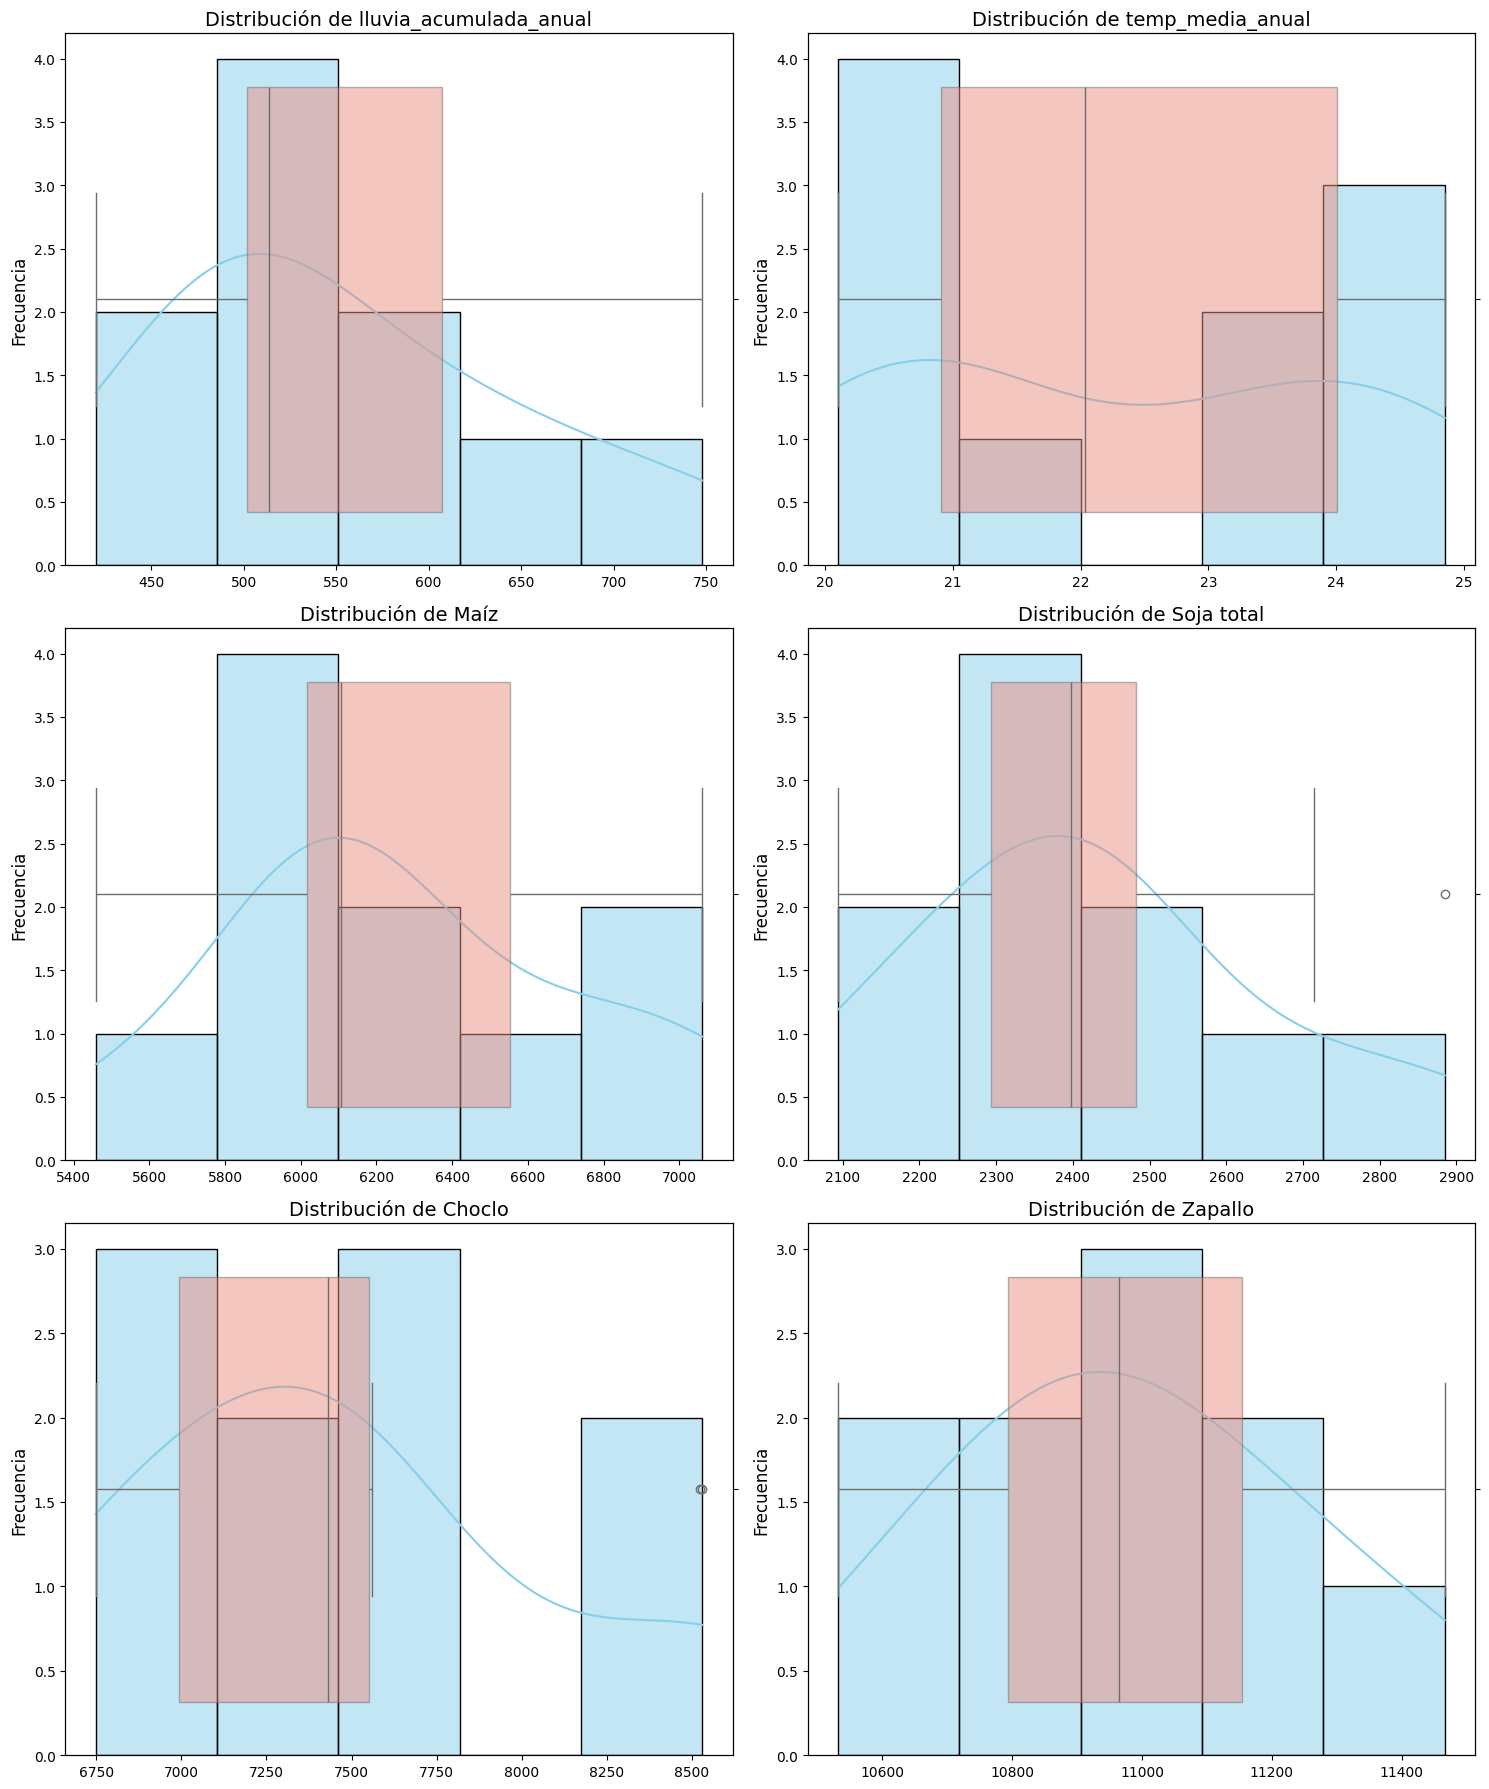

In [47]:
print(" Análisis univariado")
# Lista de variables clave para el análisis univariado
variables_univariado = ['lluvia_acumulada_anual', 'temp_media_anual', 'Maíz', 'Soja total', 'Choclo', 'Zapallo']

# Crea la figura y los ejes para los subplots (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

for i, var in enumerate(variables_univariado):
    ax = axes[i]

    # Crea el histograma
    sns.histplot(df_final_entrenamiento[var], kde=True, ax=ax, color='skyblue')

    # Agrega un título que refleje la variable
    ax.set_title(f'Distribución de {var}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia', fontsize=12)


    ax_boxplot = ax.twinx()
    sns.boxplot(
        x=df_final_entrenamiento[var],
        ax=ax_boxplot,
        color='salmon',
        boxprops={'alpha': 0.5}
    )

    ax_boxplot.set_ylabel('')
    ax_boxplot.set(yticklabels=[])
    ax_boxplot.set(ylabel=None)

plt.tight_layout()
plt.show()


El conjunto sintetico de datos tiene,  10 entradas y 8 variables. A partir de las estadísticas descriptivas, podemos extraer lo siguiente:

Variables Climáticas:

Lluvia Anual: La precipitación media es de 554.2 mm, con una variación considerable (desviación estándar de 99.7 mm).

Temperatura Anual: La temperatura media es de 22.3°C, mostrando poca variación a lo largo de los años (desviación estándar de 1.83°C).

Estado ENSO: Los valores de -1, 0 y 1 reflejan La Niña, el estado neutro y El Niño, respectivamente. La media de -0.1 indica una ligera tendencia hacia años de La Niña.

Rendimiento de Cultivos:

Maíz y Soja: Los rendimientos promedio son 6,260 kg/ha y 2,427 kg/ha, respectivamente, con desviaciones estándar que reflejan la variabilidad causada por factores climáticos.

Choclo y Zapallo: Los rendimientos promedio simulados son 7,482 kg/ha y 10,974 kg/ha. Tienen una desviación estándar relativamente baja (623.8 y 279.3), lo que indica que los rendimientos simulados están bastante agrupados alrededor de la media.

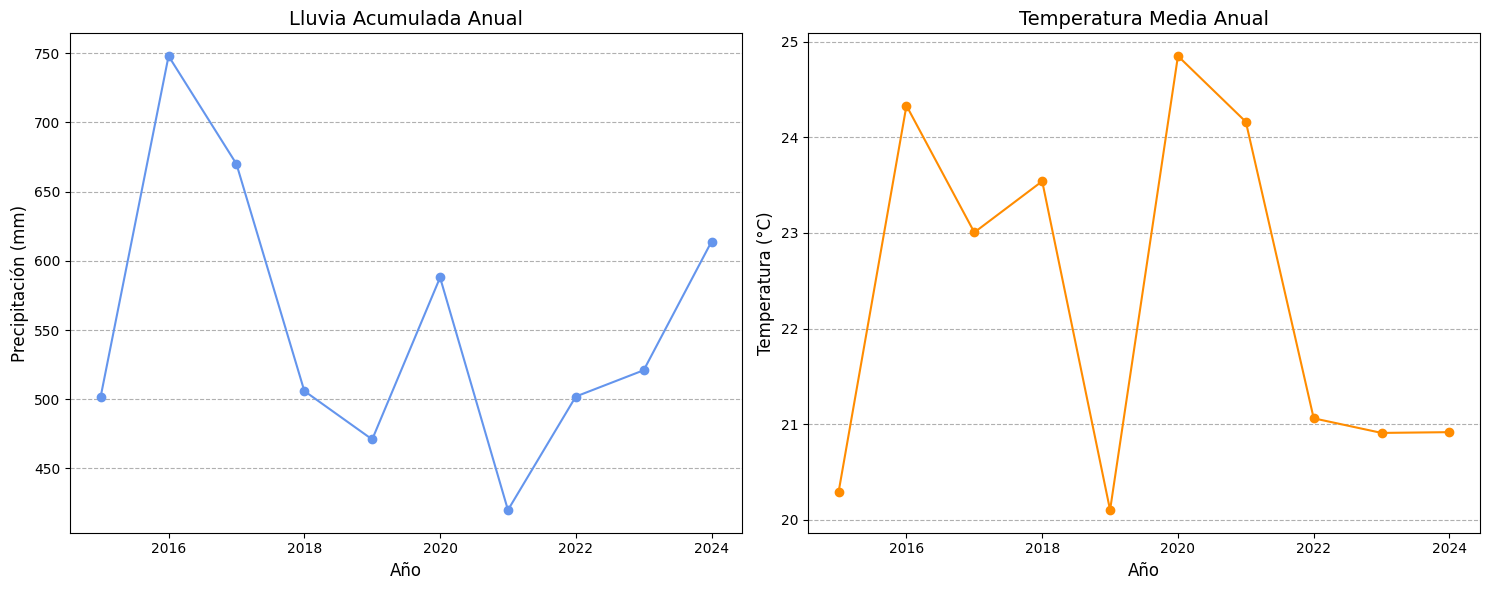

In [49]:
import matplotlib.pyplot as plt

# Crea la figura y los ejes para los subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Gráfico de Líneas para Lluvia Anual
ax1.plot(df_final_entrenamiento['YEAR'], df_final_entrenamiento['lluvia_acumulada_anual'],
         marker='o', color='cornflowerblue', linestyle='-')
ax1.set_title('Lluvia Acumulada Anual', fontsize=14)
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Precipitación (mm)', fontsize=12)
ax1.grid(axis='y', linestyle='--')

# Subplot 2: Gráfico de Líneas para Temperatura Anual
ax2.plot(df_final_entrenamiento['YEAR'], df_final_entrenamiento['temp_media_anual'],
         marker='o', color='darkorange', linestyle='-')
ax2.set_title('Temperatura Media Anual', fontsize=14)
ax2.set_xlabel('Año', fontsize=12)
ax2.set_ylabel('Temperatura (°C)', fontsize=12)
ax2.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

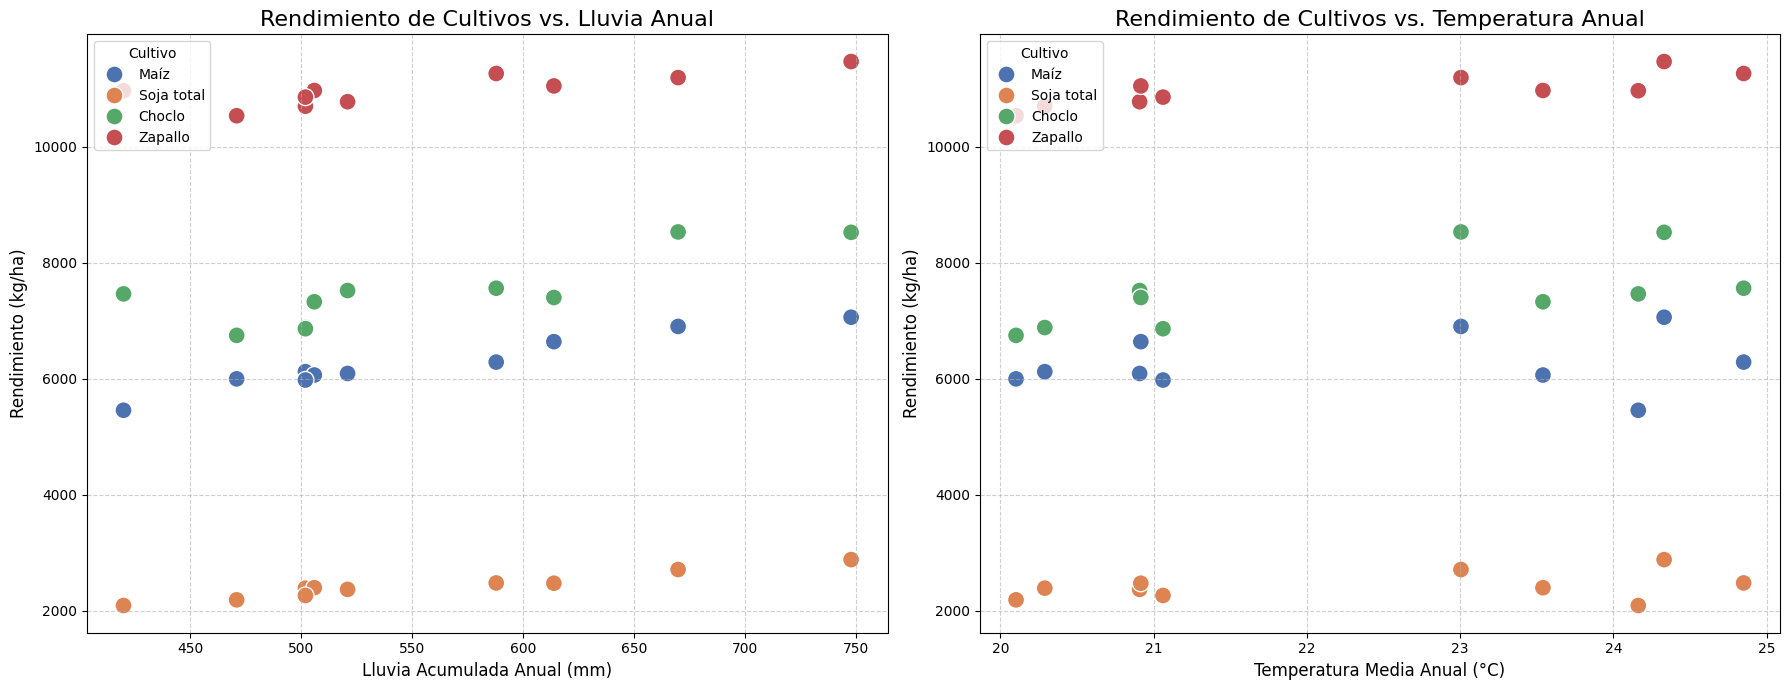

In [50]:
# Creamos un nuevo DataFrame en formato "largo" (long format)
df_rendimientos_largo = df_final_entrenamiento.melt(
    id_vars=['YEAR', 'lluvia_acumulada_anual', 'temp_media_anual'],
    value_vars=['Maíz', 'Soja total', 'Choclo', 'Zapallo'],
    var_name='Cultivo',
    value_name='Rendimiento'
)

# Creamos la figura y los ejes para los subplots (1 fila, 2 columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- Gráfico 1: Rendimiento vs. Lluvia Anual ---
sns.scatterplot(
    data=df_rendimientos_largo,
    x='lluvia_acumulada_anual',
    y='Rendimiento',
    hue='Cultivo',
    palette='deep',
    s=150,
    ax=ax1
)
ax1.set_title('Rendimiento de Cultivos vs. Lluvia Anual', fontsize=16)
ax1.set_xlabel('Lluvia Acumulada Anual (mm)', fontsize=12)
ax1.set_ylabel('Rendimiento (kg/ha)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(title='Cultivo', loc='upper left')

# --- Gráfico 2: Rendimiento vs. Temperatura Anual ---
sns.scatterplot(
    data=df_rendimientos_largo,
    x='temp_media_anual',
    y='Rendimiento',
    hue='Cultivo',
    palette='deep',
    s=150,
    ax=ax2
)
ax2.set_title('Rendimiento de Cultivos vs. Temperatura Anual', fontsize=16)
ax2.set_xlabel('Temperatura Media Anual (°C)', fontsize=12)
ax2.set_ylabel('Rendimiento (kg/ha)', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(title='Cultivo', loc='upper left')

plt.tight_layout()
plt.show()

En los gráficos de dispersión Se puede observar cómo los puntos de los cultivos de maíz y soja (en azul y naranja) se agrupan en las zonas de mayor rendimiento a medida que la lluvia anual aumenta.

Choclo y Zapallo
En contraste, los datos para el choclo y el zapallo no muestran una relación tan clara con las variables climáticas. Sus rendimientos son más variables y no siguen el patrón de los cultivos de maíz y soja. en mi opinion por tener mayor Tolerancia a la sequía.

El Fenómeno ENSO
La matriz de correlación también revela una correlación negativa entre el estado ENSO (El Niño-Oscilación del Sur) y la temperatura media anual (-0.51). Esto sugiere que durante los años en los que el fenómeno ENSO está presente, la temperatura media tiende a ser más baja. La correlación entre el ENSO y el rendimiento de los cultivos es muy débil y casi nula (-0.06 para maíz y -0.07 para soja), lo que indica que no tienen una influencia directa y significativa en la producción de estos cultivos.

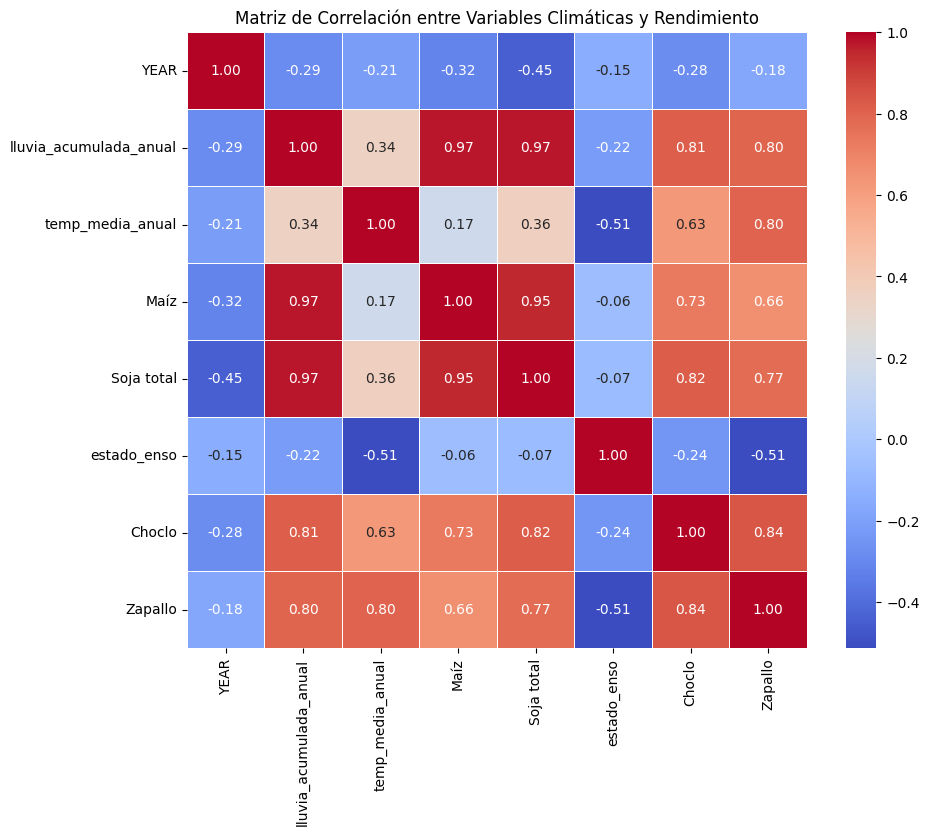

 Matriz de correlación y heatmap generados con éxito.


In [51]:
# Calcular la matriz de correlación
matriz_correlacion = df_final_entrenamiento.corr()

# Crear un mapa de calor (Heatmap) para visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Climáticas y Rendimiento')
plt.show()

print(" Matriz de correlación y heatmap generados con éxito.")

Heatmap :

Lluvia y Rendimiento: Observa la línea de lluvia_acumulada_anual. El valor de correlación con Maíz es 0.97 y con Soja total es 0.97. Esto es una correlación positiva extremadamente fuerte. Confirma que la precipitación es, por lejos, el factor más importante para determinar el rendimiento de los cultivos.

Temperatura y Rendimiento: en la línea de temp_media_anual. El valor con Maíz es 0.17 y con Soja total es 0.36. Estas son correlaciones positivas, pero mucho más débiles que la de la lluvia, pero su impacto en el rendimiento no es tan directo o significativo como el de las lluvias.

ENSO y Rendimiento: La correlación de estado_enso con los rendimientos de los cultivos (-0.06 y -0.07) es prácticamente nula. Esto es interesante. A pesar de que el estado ENSO es un factor climático importante, su relación directa con el rendimiento no es significativa, aunque sí tiene una correlación negativa con la temperatura (-0.51).


In [55]:
#  Quise probar profile( perfilado automático de datos)
!pip install ydata-profiling

# Importar la clase necesaria
from ydata_profiling import ProfileReport

# Generar el reporte de perfilado para df_final_entrenamiento
# El título del reporte será "Reporte de Perfilado de Datos de Cultivos"
profile = ProfileReport(df_final_entrenamiento, title="Reporte de Perfilado de Datos de Cultivos")

# Guardar el reporte en un archivo HTML
# El archivo se llamará "r_p_agro.html"
profile.to_file("reporte_perfilado_datos.html")

print("Reporte de perfilado de datos generado.")
import shutil
import os

# Define la ruta del reporte
ruta_origen = "reporte_perfilado_datos.html"

# Define la ruta en tu Drive
ruta_destino = os.path.join('/content/drive/MyDrive/', 'r_p_agro.html')

# Copia el archivo
shutil.copy(ruta_origen, ruta_destino)

print(f"El reporte se ha guardado en tu Google Drive en: {ruta_destino}")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 86.52it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Reporte de perfilado de datos generado.
El reporte se ha guardado en tu Google Drive en: /content/drive/MyDrive/r_p_agro.html
